# Visualizing Multiple Data Sets

We wish to compare the firearms mortality rates in 2005 to those in 2014. These are stored in the dataframe in the `RATE-2005` and `RATE-2014` columns. (There is also a `Total Laws 2014` column that we will not be using yet.)

Since we will be creating several plots of these data sets, it is convenient to store the values in the appropriate columns of the dataframe as lists or numpy arrays. Here we store the values as numpy arrays to allow us to use some of numpy's built-in methods later in this chapter:

In [64]:
import numpy as np
import pandas as pd
df=pd.read_csv(
 "http://wireless.ece.ufl.edu/jshea/idse/data/firearms-combined.csv")
rate2005=np.array(df["RATE-2005"])
rate2014=np.array(df["RATE-2014"])

As before, we will start with scatter plots and then create histograms of the data:

## Scatter Plots for Multiple Datasets

The easiest way to create most plots with multiple datasets is to simply call Matplotlib's multiple times from within a single cell:

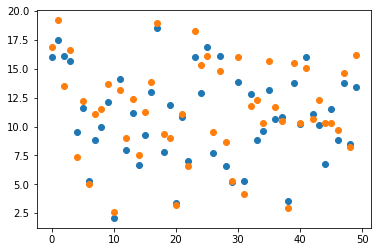

In [65]:
import matplotlib.pyplot as plt
N=len(rate2014)

plt.scatter(range(N), rate2005)
plt.scatter(range(N), rate2014);

Note that Matplotlib automatically chooses different colors for the points plotted from the second call to `scatter()`, allowing us to see that there are two distinct data sets being plotted (although with no indication of which is which -- we will fix this soon).

Although this graph does not provide much insight into whether there is a difference between these two datasets, it is worth exploring how to make this graph more presentable. When working with different datasets, it is a good practice to use a unique marker style for reach dataset. This is especially important when data may be printed because many people still print to a black and white printer and because some people cannot distinguish certain types of colors (colorblindness). 

When using `plt.scatter` the easiest way to set the marker type is to pass a string indicating the desired marker type using the `marker` keyword parameter:

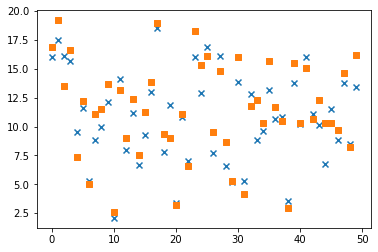

In [66]:
plt.scatter(range(N), rate2005, marker='x')
plt.scatter(range(N), rate2014, marker='s');

Some commonly used marker types include:
```
"."		point
"o"		circle
"s"		square
"+"		plus
"x"		x
```

For a complete list of marker types, consult the Matplotlib documentation:

[matplotlib.markers](https://matplotlib.org/stable/api/markers_api.html)

It is also important to provide a legend to indicate what the different markers mean. This is most easily done in two steps:
1. When calling `plt.scatter()` for each data set, pass the text that you would like to appear in the legend for that data set using the `label` keyword argument.
2. After all `plt.scatter()` calls are complete, call `plt.legend()` to draw the legend.

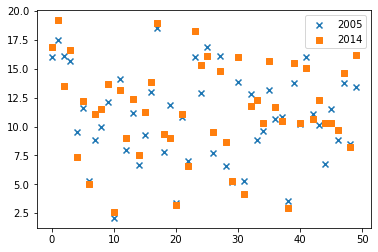

In [67]:
plt.scatter(range(N), rate2005, marker='x',
           label='2005')
plt.scatter(range(N), rate2014, marker='s',
           label='2014')

plt.legend();

Finally, add axis labels and a title to finish the graph:

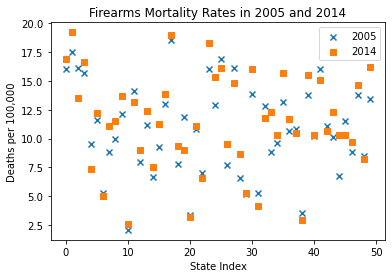

In [68]:
plt.scatter(range(N), rate2005, marker='x',
           label='2005')
plt.scatter(range(N), rate2014, marker='s',
           label='2014')

plt.legend()
plt.title('Firearms Mortality Rates in 2005 and 2014')
plt.xlabel('State Index')
plt.ylabel('Deaths per 100,000');

One good reason to always start with a scatter plot is that we can identify *outliers*:

````{panels}
DEFINTION
^^^
outlier
: A value in a dataset that takes on a value that is not reasonable, based on the other values in the dataset or other domain knowledge. Outliers are often due to data entry, measurement, or unit conversion errors.
````

To see how scatter plots can identify outliers, let's create modified versions of our data sets with known errors:

In [69]:
outlier2005=rate2005.copy()
outlier2014=rate2014.copy()

outlier2005[10]=30
outlier2014[20]=-5

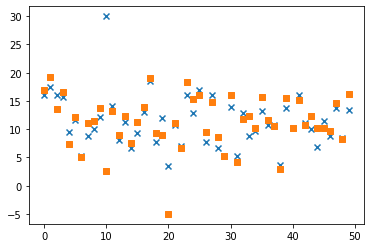

In [47]:
plt.scatter(range(N), outlier2005, marker='x',
           label='2005')
plt.scatter(range(N), outlier2014, marker='s',
           label='2014');

The values for states 10 and 20 literally "stick out" from the rest of the values. This does not necessarily mean that those values are not valid, but it definitely indicates that they should be checked carefully. For instance, a negative value is not possible for a mortality rate, so that value can immediately be identified as an error. On the other hand, the exceptionally high value (30) could actually be a valid result. In this case, additional  research may be needed to try to confirm whether it is a valid data point.

Values identified as outliers may be dealt with in several ways. Two typical ways are to remove them from the data sets or to replace them with the averages of the other values. How to make such choices is usually up to the data scientist, and the implications of these choices is beyond the scope of this  book.

An advantage of scatter plots is that sometimes these values do not stick out as much in other plots, such as a histogram -- which leads us to our next visualization.

## Histograms for Multiple Datasets

As with the data in Chapter XX, we next want to study the rates of occurrence of the values of the data. However, unlike the histograms we previously generated, this data takes on **real values**, not just integers. One implication of this is that we cannot meaningfully count the data (for instance to compute the relative frequencies):

In [48]:
np.unique(rate2005, return_counts=True)

(array([ 3.4,  3.6,  5.2,  5.3,  6.6,  6.7,  6.8,  7. ,  7.7,  7.8,  8. ,
         8.5,  8.8,  9.3,  9.5,  9.6, 10. , 10.1, 10.2, 10.7, 10.8, 11.1,
        11.2, 11.5, 11.6, 11.9, 12.1, 12.8, 12.9, 13. , 13.2, 13.4, 13.8,
        13.9, 14.1, 15.7, 16. , 16.1, 16.9, 17.5, 18.5, 30. ]),
 array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1]))

There is exactly one occurrence of most (36) of the values. If the mortality rates were calculated to more than one decimal place, it is likely that all of the values would be distinct. Yet we can see that the values are not evenly distributed: there are only two values in the range $[3,5)$, but there are ten values in the range $[10,12)$.

The `plt.hist()` function is designed to generate meaningful histograms for continuous data by counting the number of occurrences per bin:

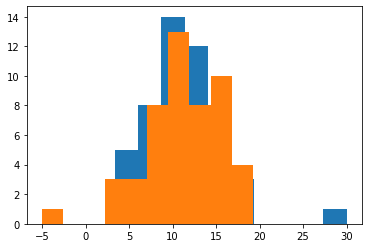

In [49]:
plt.hist(rate2005)
plt.hist(rate2014);

Each bar of the histgram represents a "bin" of data values. In fact, the counts and bin edges are returned by the hist function:

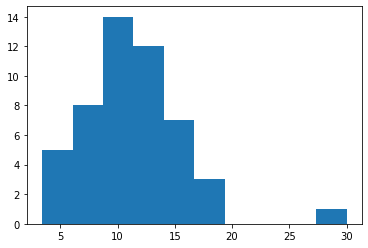

In [50]:
counts, bins, _ =plt.hist(rate2005)

Note that here I used a Python convention of storing the matplotlib patches information, which is the third returned value, in the variable "_" (underscore) to indicate that it is a value that we do not care about.

We can inspect the bins and counts by evaluating those variables or printing them:

In [51]:
print("Bins:", bins)
print("Counts:", counts)

Bins: [ 3.4   6.06  8.72 11.38 14.04 16.7  19.36 22.02 24.68 27.34 30.  ]
Counts: [ 5.  8. 14. 12.  7.  3.  0.  0.  0.  1.]


Some styling will help make this more legible. The `alpha` keyword parameter in matplotlib sets the transparency (from totally transparent (`alpha=0`) to totally opaque (`alpha=1`). Adding transparency makes it much easier to see the data in both histograms:

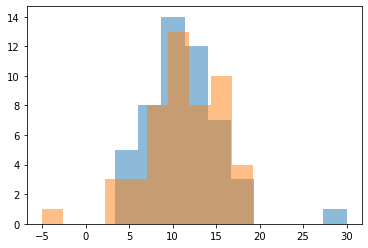

In [52]:
plt.hist(rate2005,alpha=0.5)
plt.hist(rate2014,alpha=0.5);

The choice of `alpha = 0.5` is usually a good starting point, but the best value to use is up to the graph's creator. 



#### Choosing the number/size of histogram bins

Unlike integer data, when the data comes from the continuous real line, there is no right way to choose the size or number of the histogram bins.

We can easily change the number of bins to provide more resolution into the data; however if we increase the number of bins, the number of data points per bin will be lower. 

If we just want to specify a number of bins (instead of a list of bin edges, like in the previous chapter), then we can just pass number of bins to the `bins` keyword argument:

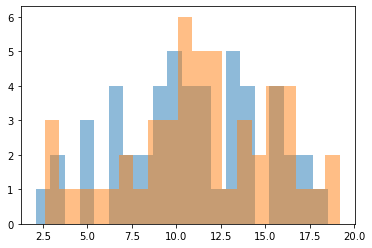

In [83]:
plt.hist(rate2005,alpha=0.5,bins=20)
plt.hist(rate2014,alpha=0.5,bins=20);

If we increase the number of bins too much, we will run into a similar problem we had in counting using `np.unique()`: most of the bins will have either 1 or 0 values in them:

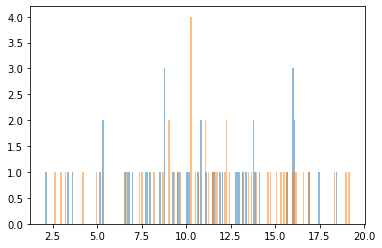

In [84]:
plt.hist(rate2005,alpha=0.5,bins=200)
plt.hist(rate2014,alpha=0.5,bins=200);

Thus the number of bins should be chosen to balance between providing more resolution versus having sufficiently high counts in the bins to see how the values are distributed. Selecting the number of bins to achieve an appropriate balance is up to the graph creator. There are some research papers that provide techniques to select the number of bins; however, they are beyond the scope of this book. 

If you need a guidline for selecting the number of histogram bins, you can try:

**Make the number of bins as large as possible while ensuring that  at least 50% of the bins contain at least 2 data points.**

#### Bin alignment for multiple histograms in one figure

One issue that arises when plotting multiple histograms in one figure is that the bins created by each call to `plt.hist()` are not aligned. This can be helpful in that the bins are typically offset from each other, which makes it easier to see the separate bar heights. However, the bar heights cannot be directly compared because they correspond to different ranges of data. There are various solutions, but let's use `numpy` to create our own set of bin edges. Start by finding the min and max of each data set:

In [73]:
print(np.min(rate2005), np.min(rate2014))
print(np.max(rate2005), np.max(rate2014))

2.1 2.6
18.5 19.2


Now we can make a linearly spaced set of bin edges from the minimum to the maximum values using NumPy's `linspace()` function. It is usually called with three arguments: start, stop, number of points:

In [76]:
bin_edges=np.linspace(2.1, 19.2, 20)
print(bin_edges)

[ 2.1  3.   3.9  4.8  5.7  6.6  7.5  8.4  9.3 10.2 11.1 12.  12.9 13.8
 14.7 15.6 16.5 17.4 18.3 19.2]


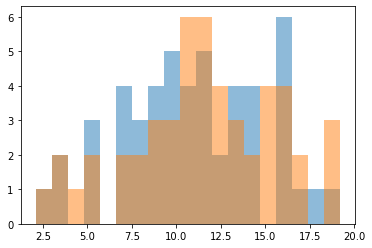

In [77]:
plt.hist(rate2005,alpha=0.5,bins=bin_edges,label="2005")
plt.hist(rate2014,alpha=0.5,bins=bin_edges,label="2014");

Now we can finish the graph by providing data labels and adding a legend and axis labels. In this case, we might omit a title because the title would probably be something like "Mortality Rate Histograms for 2005 and 2014", which can already be determined from inspecting the graph.

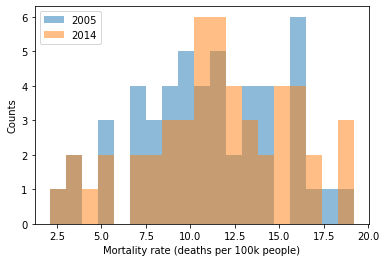

In [78]:
plt.hist(rate2005,alpha=0.5,bins=bin_edges,label="2005")
plt.hist(rate2014,alpha=0.5,bins=bin_edges,label="2014");
plt.legend()
plt.xlabel("Mortality rate (deaths per 100k people)")
plt.ylabel("Counts");

What inferences might you make from this plot?

A quick visual inspect should indicate that the two data sets are quite similar. However, we can see that the in from 5 to 10, the 2005 data set has higher counts, while in the bins from 10 to 19.2, the 2014 data set has more bins with a higher count.

The histogram gives us some insight into how these data sets might be similar or different, but they do not give us a way to perform a quantitative comparison or to determine if any observed difference is likely to have come from real differences in the underlying data sets or could just be attributed to randomness. To resolve both these issues, we can compute values that capture some summary information about the data set. We call these values **summary statistics**: